# Daub 5/3 integer-to-integer system

In [222]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Импорт пользовательских функций.

In [223]:
from Functions.user_functions import indx_even
from Functions.daub_5_3 import daub_5_3
from Functions.daub_5_3_lift import daub_5_3_lift
from Functions.idaub_5_3_lift import idaub_5_3_lift
from Functions.daub_5_3_lift_2D import daub_5_3_lift_2D
from Functions.idaub_5_3_lift_2D import idaub_5_3_lift_2D

In [224]:
f = np.random.randint(low=-10, high=11, size=8)
N = len(f)
d = [0] * (N//2)
a = [0] * (N//2)

### Исследование коэффициентов ${d}$

In [225]:
# Функция вычисления коэффициентов флуктуации.
def d_func(k, f, N, int_flag):
    if int_flag:
        return f[indx_even(2*k+1,N)] - (f[indx_even(2*k,N)] + f[indx_even(2*k+2,N)]) //2
    else:
        return f[indx_even(2*k+1,N)] - (f[indx_even(2*k,N)] + f[indx_even(2*k+2,N)]) /2

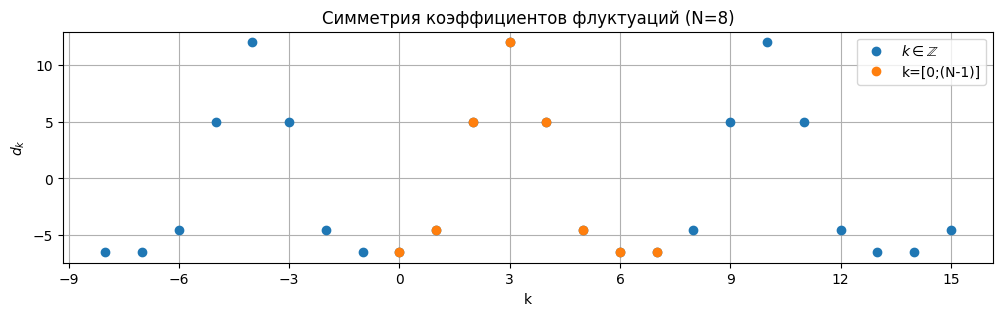

In [226]:
n_gr = []
d_gr = []
for k in range(-N,2*N):
    n_gr.append(k)
    d_gr.append(d_func(k, f, N, int_flag=False))
n_gr_N = []
d_gr_N = []

for k in range(N):
    n_gr_N.append(k)
    d_gr_N.append(d_func(k, f, N, int_flag=False))
    
fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(12)
ax.plot(n_gr, d_gr, 'o')
ax.plot(n_gr_N, d_gr_N, 'o')

# Force integer ticks on x-axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.legend(['$k \in \mathbb{Z}$','k=[0;(N-1)]'])
plt.title('Симметрия коэффициентов флуктуаций' + ' (N=' + str(N) + ')')
plt.xlabel('k')
plt.ylabel('$d_k$')
plt.grid(True)
plt.savefig('readme_img/d_symmetry.png', bbox_inches='tight')
plt.show()

Отсюда вывод: ${d_{-1} = d_0}$.

## Прямое преобразование

In [227]:
for k in range(N//2):
    d[k] = f[indx_even(2*k+1,N)] - (f[indx_even(2*k,N)] + f[indx_even(2*k+2,N)])/2
    if k == 0:
        a[k] = f[indx_even(2*k,N)] + d[k] /2
    else:
        a[k] = f[indx_even(2*k,N)] + (d[k-1] + d[k]) /4
    #a[k] = -1/8*(f[indx_even(2*k-2,N)] + f[indx_even(2*k+2,N)]) + 1/4*(f[indx_even(2*k-1,N)] + f[indx_even(2*k+1,N)]) + 3/4*f[indx_even(2*k,N)]
print('a', a)
print('d', d)

a [-4.25, 1.25, -6.875, -4.75]
d [-6.5, -4.5, 5.0, 12.0]


## Обратное преобразование

In [228]:
f_rec = [0] * N
# Odd values.
for k in range(N//2):
    if k == 0:
        f_rec[2*k] = a[k] - d[k] /2
    else:
        f_rec[2*k] = a[k] - (d[k-1] + d[k]) /4

# Even values.
for k in range(N//2):
    f_rec[2*k+1] = d[k] + (f[2*k] + f[indx_even(2*k+2,N)])/2
print('Reconstruction:', f_rec)
print('Original:', f)
print('Difference:', f-f_rec)

Reconstruction: [-1.0, -5.0, 4.0, -6.0, -7.0, -3.0, -9.0, 3.0]
Original: [-1 -5  4 -6 -7 -3 -9  3]
Difference: [0. 0. 0. 0. 0. 0. 0. 0.]


## Прямое и обратное преобразование при помощи матричных операций

In [229]:
Mdir = np.matrix(np.concatenate(daub_5_3(N), axis = 0))
tr = np.matrix(f)*(Mdir.T)
Mrev = np.linalg.inv(Mdir).T
print('Wavelet coefficients:', tr.tolist()[0])
print('Reconstruction:', (tr * Mrev).tolist()[0])
print('Original:', f)
print('Difference:', f-(tr * Mrev).tolist()[0])

Wavelet coefficients: [-4.25, 1.25, -6.875, -4.75, -6.5, -4.5, 5.0, 12.0]
Reconstruction: [-1.0, -5.0, 4.0, -6.0, -7.0, -3.0, -9.0, 3.0]
Original: [-1 -5  4 -6 -7 -3 -9  3]
Difference: [0. 0. 0. 0. 0. 0. 0. 0.]


## Целочисленные преобразования

Созданы функции lifting-преобразования.

In [230]:
# float-преобразование.
coeff_float = daub_5_3_lift(f, int_flag=False)
print(coeff_float)

# int-преобразование.
coeff_int = daub_5_3_lift(f, int_flag=True)
print(coeff_int)

[-4.25   1.25  -6.875 -4.75  -6.5   -4.5    5.    12.   ]
[-4  1 -7 -5 -7 -5  5 12]


Обратное преобразование, также по lifting-схеме.

In [231]:
# float-преобразование.
f_float = idaub_5_3_lift(coeff_float, int_flag=False)
print(np.array(f_float).dtype)
print(f_float)

# int-преобразование.
f_int = idaub_5_3_lift(coeff_int, int_flag=True)
print(np.array(f_int).dtype)
print(f_int)

print('Difference:', [a - b for a, b in zip(f_float, f_int)])

float64
[-1.0, -5.0, 4.0, -6.0, -7.0, -3.0, -9.0, 3.0]
int32
[-1, -5, 4, -6, -7, -3, -9, 3]
Difference: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


## 2D-преобразование

Формируем двумерный массив.

In [238]:
g = np.random.randint(low=-10, high=11, size=10*8).reshape(10,8)
print(g)

[[ -1  -4  -9 -10  -2 -10   8  -6]
 [  5  -8  -9   0   3 -10   8  -7]
 [  9  -7  -2   8  -9  -2   6  -9]
 [ -5  -4  -2   0   0   7   3   3]
 [ -4  -9   6  -7   9   8   2  -8]
 [  1   1 -10   4  -5  -8   9   6]
 [ -6   4  -2 -10   7   6 -10  -6]
 [ -8  -8  -1   4   9   9   9   7]
 [  9  -7   4  -8  -4  -8   1  -4]
 [  2   9  10 -10   9  -4   3  -2]]


### Прямое преобразование

In [239]:
# float-преобразование.
coeff_2D_float = daub_5_3_lift_2D(g, int_flag=False)
print(coeff_2D_float.dtype)
print(coeff_2D_float)

float64
[[ -2.5       -0.125     -6.25       0.875      7.        -7.5
    2.5        1.      ]
 [  5.375      4.5625    -6.5       -0.25      -7.25      11.5
    4.5       -7.5     ]
 [ -8.25       3.6875     7.5       -4.9375   -12.5      -20.75
    4.75      -8.5     ]
 [  1.         0.6875     3.5625   -14.25       7.       -18.25
   12.5        6.5     ]
 [  5.375     -3.375    -12.9375    -5.75     -13.25       1.75
   -1.5       -1.5     ]
 [  2.71875   -8.640625  -3.3125     0.53125   -6.0625     4.
  -13.75     -16.625   ]
 [ -5.96875    0.1875     1.875      3.078125  -5.4375    -1.3125
    7.8125    -4.      ]
 [  1.9375    -4.65625   -1.859375   0.953125   4.125      1.75
   -5.6875    -3.5     ]
 [ -8.15625   -2.546875   6.65625    3.5       -5.0625    -4.125
    2.75      -0.75    ]
 [  6.1875     4.1875    -4.84375   -3.625     -3.625    -18.625
  -10.75      -5.75    ]]


In [240]:
# int-преобразование.
coeff_2D_int = daub_5_3_lift_2D(g, int_flag=True)
print(coeff_2D_int.dtype)
print(coeff_2D_int)

int32
[[ -2   0  -6   1   7  -8   3   1]
 [  5   5  -7   0  -8  11   4  -8]
 [ -9   4   7  -5 -12 -21   4  -9]
 [  1   1   4 -15   7 -19  12   6]
 [  5  -3 -14  -6 -14   2  -2  -2]
 [  3  -9  -3   0  -6   4 -14 -17]
 [ -6   0   2   3  -6  -1   7  -4]
 [  2  -5  -2   1   4   1  -6  -4]
 [ -8  -2   7   4  -6  -4   3  -1]
 [  7   5  -5  -4  -4 -19 -11  -6]]


In [241]:
print(np.sum(g.astype(float)**2))
print(np.sum(coeff_2D_int.astype(float)**2))

3541.0
4422.0


### Обратное преобразование

In [ ]:
g_float = idaub_5_3_lift_2D(coeff_2D_float, int_flag=False)
print(g_float)
print('Difference (sum):', np.sum((g-g_float)**2))

[[ -1.  -4.  -9. -10.  -2. -10.   8.  -6.]
 [  5.  -8.  -9.   0.   3. -10.   8.  -7.]
 [  9.  -7.  -2.   8.  -9.  -2.   6.  -9.]
 [ -5.  -4.  -2.   0.   0.   7.   3.   3.]
 [ -4.  -9.   6.  -7.   9.   8.   2.  -8.]
 [  1.   1. -10.   4.  -5.  -8.   9.   6.]
 [ -6.   4.  -2. -10.   7.   6. -10.  -6.]
 [ -8.  -8.  -1.   4.   9.   9.   9.   7.]
 [  9.  -7.   4.  -8.  -4.  -8.   1.  -4.]
 [  2.   9.  10. -10.   9.  -4.   3.  -2.]]
Difference (sum): 0.0


In [248]:
g_int = idaub_5_3_lift_2D(coeff_2D_int, int_flag=True)
print(g_int)
print('Difference (sum):', np.sum((g-g_int).astype(float)**2))

[[ -1  -4  -9 -10  -2 -10   8  -6]
 [  5  -8  -9   0   3 -10   8  -7]
 [  9  -7  -2   8  -9  -2   6  -9]
 [ -5  -4  -2   0   0   7   3   3]
 [ -4  -9   6  -7   9   8   2  -8]
 [  1   1 -10   4  -5  -8   9   6]
 [ -6   4  -2 -10   7   6 -10  -6]
 [ -8  -8  -1   4   9   9   9   7]
 [  9  -7   4  -8  -4  -8   1  -4]
 [  2   9  10 -10   9  -4   3  -2]]
Difference (sum): 0.0
